In [97]:
import torch
import torch.nn as nn
import torch.optim as optim

In [98]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [99]:
t_u.shape

torch.Size([11, 1])

In [101]:
linear_model = nn.Linear(1, 1)

optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [100]:
linear_model.parameters()

<generator object Module.parameters at 0x7f98bcf64c80>

In [102]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.9331]], requires_grad=True),
 Parameter containing:
 tensor([0.1096], requires_grad=True)]

In [104]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

In [103]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 0,  6,  3,  1,  7,  4,  8, 10,  5]), tensor([9, 2]))

In [105]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [106]:
training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un,
    t_u_val = val_t_un,
    t_c_train = train_t_c,
    t_c_val = val_t_c)

Epoch 1, Training loss 87.4362, Validation loss 71.0572
Epoch 1000, Training loss 3.4776, Validation loss 2.7088
Epoch 2000, Training loss 2.9427, Validation loss 2.9774
Epoch 3000, Training loss 2.9341, Validation loss 3.0138


In [107]:
print()
print(linear_model.weight)
print(linear_model.bias)


Parameter containing:
tensor([[5.4100]], requires_grad=True)
Parameter containing:
tensor([-17.3962], requires_grad=True)


In [108]:
from collections import OrderedDict

In [109]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

In [110]:
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [111]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

In [112]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = train_t_un,
    t_u_val = val_t_un,
    t_c_train = train_t_c,
    t_c_val = val_t_c)

Epoch 1, Training loss 197.9233, Validation loss 214.2921
Epoch 1000, Training loss 4.6820, Validation loss 3.6891
Epoch 2000, Training loss 3.8652, Validation loss 4.3228
Epoch 3000, Training loss 1.6698, Validation loss 3.2880
Epoch 4000, Training loss 1.5759, Validation loss 3.2851
Epoch 5000, Training loss 1.5523, Validation loss 3.2602


In [113]:
from matplotlib import pyplot as plt

In [114]:
t_range = torch.arange(20., 90.).unsqueeze(1)

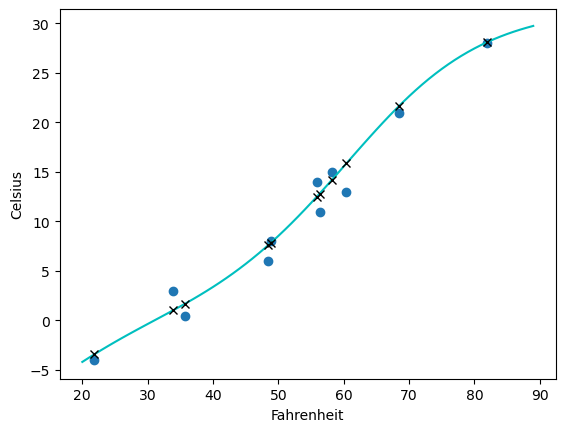

In [120]:
fig = plt.figure(dpi=100)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')